# Writing Functions

A function is basically a sequence of operations. It may take inputs via arguments. And it may give the result by returning value.

Let us a function square which basically gives square of whatever we pass as argument.

In [22]:
def sq(x):
    return x*x

In [23]:
sq(4)

16

In [24]:
sq(10)

100

# Differentiation

Differentiation is basically about finding the rate of change.

Rate of change of distance is velocity. Rate of change of velocity is acceleration.

If you plot rate of change of y with respect to x for a straight line y = mx +c , you will get a constant horizontal line.

If you plot, rate of change of y with respect to x for a parabola, it gives a straight line. 


In [7]:
def diff(fn, x):
    delta = 0.000000000001
    y = fn(x)
    x1 = x + delta
    y1 = fn(x1)
    return (y1 - y)/(x1 - x)

In [8]:
diff(sq, 2)

4.0

In [12]:
x = 2
2*x

4

In [18]:
def cb(x):
    return x*x*x
cb(10)

1000

In [16]:
diff(cb, 2)

12.0

In [17]:
x = 2
3*x^2

4

## Another way to calculate

In [13]:
def diff2(fn, x):
    delta = 0.000000000001
    return (fn(x+delta) - fn(x-delta))/(2*delta)

In [15]:
diff2(sq, 2)

4.000355602329364

## Partial Derivative

In [25]:
import numpy as np

def line_y(m, c, x):
    return m*x + c

def diffp(fn, idx, *args):
    delta = 0.000000000001
    y = fn(*args)
    
    args = list(args)
    args[idx] += delta
    
    y1 = fn(*args)
    return (y1 - y)/delta

diffp(line_y, 0, 1, 2, 3)

3.000266701747023

In [26]:
diffp(line_y, 1, 1, 2, 3)

1.000088900582341

In [13]:
diffp(line_y, 2, 1, 2, 3)

1.000088900582341

# Chain Rule

In [23]:
def sqcb(t):
    x = sq(t)
    y = cb(x)
    return y


In [24]:
diff(sqcb, 2)

192.01706891180947

In [27]:
t = 2
3*(t**2)**2 * 2*t

192

In [7]:
d_sq = diff(sq, 2)

In [9]:
x = sq(2)
d_cb = diff(cb, x)

In [10]:
d_sq * d_cb

192.0

# Gradient descent

In [4]:
import numpy as np

In [5]:
X = np.random.random((100, 1))

In [6]:
y = 4 + 3 * X + .3*np.random.randn(100, 1)

In [38]:
y[0:3]

array([[6.0480197 ],
       [6.23179591],
       [4.52338401]])

In [39]:
X[0:3]

array([[0.61169161],
       [0.6803861 ],
       [0.1883452 ]])

In [41]:
4+3*X[0:3]

array([[5.83507483],
       [6.04115831],
       [4.56503561]])

In [42]:
from matplotlib import pyplot as plt

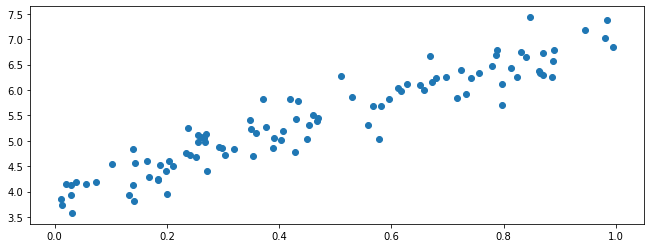

In [43]:
plt.figure(figsize=(11,4))
plt.scatter(X, y)

In [9]:
def error(m, c, X, y):
    ypred = m*X + c
    err = ypred-y
    return np.sum(err*err)

In [10]:
error(3, 4, X, y)

9.316504370147296

In [12]:
def create_error_m(c, X, y):
    def error_m(m):
        return error(m, c, X, y)
    return error_m

In [135]:
f = create_error_m(4, X, y)
f(3)

10.127658729826186

In [13]:
def create_error_c(m, X, y):
    def error_c(c):
        return error(m, c, X, y)
    return error_c

In [14]:
f = create_error_c(3, X, y)
f(4)

9.316504370147296

In [17]:
def grad_fit(X, y):
    m0 = np.random.random()
    c0 = np.random.random()
    for i in range(100):
        fm = create_error_m(c0, X, y)
        dm = diff(fm, m0)
        
        fc = create_error_c(m0, X, y)
        dc = diff(fc, c0)
        
        m0 = m0 - 0.001 * dm
        c0 = c0 - 0.001 * dc
    return (m0, c0)

In [18]:
grad_fit(X, y)

(2.9138386459431977, 4.101947662151755)

# Backpropagation

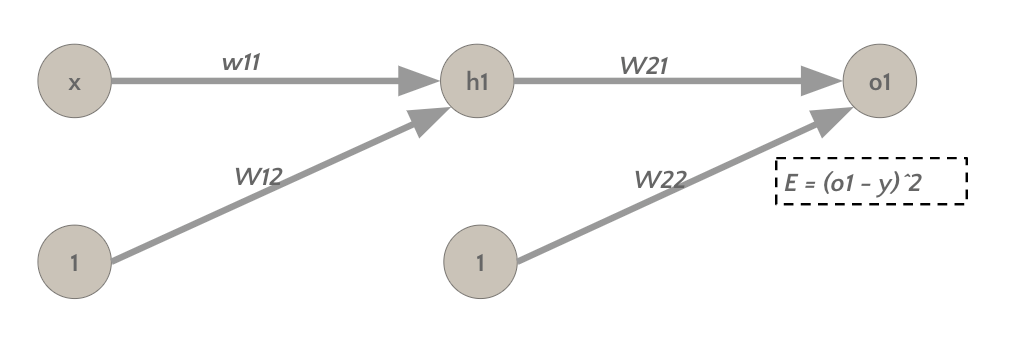

In [27]:
## Generate Data
import numpy as np

X = np.random.random((100, 1))
y = 4 + 3 * X + .3*np.random.randn(100, 1)


In [29]:
def neuron(w11, w12, x):
    return w11*x + w12

def forward_nn(w11, w12, w21, w22, x):
    h1 = neuron(w11, w12, x)
    o1 = neuron(w21, w22, h1)
    return o1

def sq_error(o1, yy):
    e = o1 - yy
    return e*e

def error_nn(w11, w12, w21, w22, x, yy):
    o1 = forward_nn(w11, w12, w21, w22, x)
    return sq_error(o1, yy)


In [44]:
w11 = 0.5
w12 = 0.5
w21 = 0.5
w22 = 0.5

eta = 0.001

for epoch in range(100):
    for i in range(len(X)):
        x = X[i]
        yy = y[i]
        
        dE_dw11 = diffp(error_nn, 0, w11, w12, w21, w22, x, yy)
        dE_dw12 = diffp(error_nn, 1, w11, w12, w21, w22, x, yy)
        dE_dw21 = diffp(error_nn, 2, w11, w12, w21, w22, x, yy)
        dE_dw22 = diffp(error_nn, 3, w11, w12, w21, w22, x, yy)
        
        w11 = w11 - eta * dE_dw11
        w12 = w12 - eta * dE_dw12
        
        w21 = w21 - eta * dE_dw21
        w22 = w22 - eta * dE_dw22

In [45]:
ycap = forward_nn(w11, w12, w21, w22, X)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


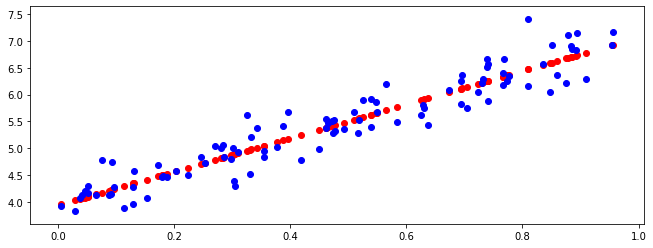

In [46]:
from matplotlib import pyplot as plt

plt.figure(figsize=(11,4))
plt.subplot()
plt.scatter(X, ycap, color='r')
plt.subplot()
plt.scatter(X, y, color='b')
plt.show()

## Extensions

1. Forward pass is only done once.
2. Neurons are many. Weight are computed in a single shot. 
3. The layers are many and the code is flexible
4. Neuron definition is complex - activation function
